In [17]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import requests
import os
import json
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [18]:
# Load API key
load_dotenv()
FMP_API_KEY = os.getenv('FMP_API_KEY')

In [19]:
# -------------------------------------------------------------
# Specify Stock Ticker and Index
# -------------------------------------------------------------
company = 'NVDA'  # Specify the stock ticker symbol
index = '^GSPC'  # Specify the index (S&P 500)

In [20]:
# -------------------------------------------------------------
# Fetch Company Overview
# -------------------------------------------------------------
# Construct the API URL to fetch company profile information
url = f'https://financialmodelingprep.com/api/v3/profile/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get the company overview
overview = requests.get(url).json()

# Convert the company overview into a DataFrame
overview = pd.DataFrame(overview)

# Set the company symbol as the index and transpose the DataFrame
overview = overview.set_index('symbol').T

# Display the company overview
overview

symbol,NVDA
price,188.61
beta,2.284
volAvg,191227934
mktCap,4592088156237
lastDiv,0.04
range,86.62-212.19
changes,-0.6
companyName,NVIDIA Corporation
currency,USD
cik,0001045810


In [21]:
# -------------------------------------------------------------
# Fetch Company Description
# -------------------------------------------------------------
# Construct the API URL to fetch the company description
url = f'https://financialmodelingprep.com/api/v4/company-outlook?symbol={company}&apikey={FMP_API_KEY}'

# Make a request to the API to get the company description
overview = requests.get(url).json()

# Extract the company description from the response
company_description = overview['profile']['description']

# Display the company description
company_description

"NVIDIA Corporation provides graphics, and compute and networking solutions in the United States, Taiwan, China, and internationally. The company's Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building 3D designs and virtual worlds. Its Compute & Networking segment provides Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; cryptocurrency mining processors; Jetson for robotics and other embedded platforms; and NVIDIA AI Enterprise and other software. The company's products are used in gaming, professional visualiza

In [22]:
# -------------------------------------------------------------
# Pull Company Historical Performance (Last 5 Years)
# -------------------------------------------------------------

import datetime as dt  # For handling date and time operations

# Set the start and end dates for the historical data
end = dt.datetime.now().date()
start = (end - dt.timedelta(days=5*365)).isoformat()  # Last 5 years from now

In [23]:
# Construct the API URL to fetch historical price data
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{company}?apikey={FMP_API_KEY}&from={start}&to={end}'

# Make a request to the API to get the historical performance
historical = requests.get(url).json()

# Convert the historical data into a DataFrame
historical = pd.DataFrame.from_dict(historical['historical'])

# Set the date as the index and convert it to datetime format
historical['date'] = pd.to_datetime(historical['date'])
historical = historical.set_index('date')

# Add company symbol and calculate daily returns
historical['symbol'] = company
historical['daily_ret'] = historical['adjClose'].pct_change().dropna()

# Display the first row of the historical DataFrame
historical

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2025-12-24,187.94,188.91,186.59,188.61,188.61,65413903,65413903,0.67000,0.356500,188.0125,"December 24, 25",0.003565,NVDA,NaN
2025-12-23,182.97,189.33,182.90,189.21,189.21,174873621,174873621,6.24000,3.410000,186.1025,"December 23, 25",0.034100,NVDA,0.003181
2025-12-22,183.92,184.16,182.35,183.69,183.69,129064400,129064400,-0.23000,-0.125050,183.5300,"December 22, 25",-0.001251,NVDA,-0.029174
2025-12-19,176.67,181.45,176.34,180.99,180.99,324925927,324925927,4.33000,2.450000,178.8625,"December 19, 25",0.024500,NVDA,-0.014699
2025-12-18,174.53,176.15,171.82,174.14,174.14,176096001,176096001,-0.39000,-0.223460,174.1600,"December 18, 25",-0.002235,NVDA,-0.037847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,13.10,13.65,12.96,13.11,13.08,560641800,560641800,0.00925,0.076336,13.2050,"January 04, 21",0.000763,NVDA,-0.021690
2020-12-31,13.14,13.15,12.92,13.06,13.03,192424400,192424400,-0.08150,-0.608830,13.0675,"December 31, 20",-0.006088,NVDA,-0.003823
2020-12-30,12.99,13.21,12.90,13.15,13.12,225397160,225397160,0.15544,1.230000,13.0625,"December 30, 20",0.012300,NVDA,0.006907


In [24]:
# -------------------------------------------------------------
# Pull Index Historical Performance (Last 5 Years)
# -------------------------------------------------------------
# Construct the API URL to fetch historical price data for the index
url = f'https://financialmodelingprep.com/api/v3/historical-price-full/{index}?apikey={FMP_API_KEY}&from={start}&to={end}'

# Make a request to the API to get the historical performance of the index
historical_sp = requests.get(url).json()

# Convert the historical data into a DataFrame
historical_sp = pd.DataFrame.from_dict(historical_sp['historical'])

# Set the date as the index and convert it to datetime format
historical_sp['date'] = pd.to_datetime(historical_sp['date'])
historical_sp = historical_sp.set_index('date')

# Add index symbol and calculate daily returns
historical_sp['symbol'] = index
historical_sp['daily_ret'] = historical_sp['adjClose'].pct_change().dropna()

# Display the first row of the historical index DataFrame
historical_sp

,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,daily_ret
date,,,,,,,,,,,,,,
2025-12-24,6904.91,6937.32,6904.91,6932.04,6932.04,1071393000,1071393000,27.13,0.392910,6919.7950,"December 24, 25",0.003929,^GSPC,NaN
2025-12-23,6872.41,6910.88,6868.81,6909.78,6909.78,3820560000,3820560000,37.37,0.543770,6890.4700,"December 23, 25",0.005438,^GSPC,-0.003211
2025-12-22,6865.21,6882.03,6855.74,6878.48,6878.48,4465030000,4465030000,13.27,0.193290,6870.3650,"December 22, 25",0.001933,^GSPC,-0.004530
2025-12-19,6792.62,6840.02,6792.62,6834.49,6834.49,8554470000,8554470000,41.87,0.616400,6814.9375,"December 19, 25",0.006164,^GSPC,-0.006395
2025-12-18,6778.06,6816.13,6758.50,6774.75,6774.75,5101190000,5101190000,-3.31,-0.048834,6781.8600,"December 18, 25",-0.000488,^GSPC,-0.008741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-04,3764.61,3769.99,3662.71,3700.65,3700.65,5015000000,5015000000,-63.96,-1.700000,3711.1200,"January 04, 21",-0.017000,^GSPC,-0.007033
2020-12-31,3733.27,3760.20,3726.88,3756.07,3756.07,3179040000,3179040000,22.80,0.610720,3747.7200,"December 31, 20",0.006107,^GSPC,0.014976
2020-12-30,3736.19,3744.63,3730.21,3732.04,3732.04,3154850000,3154850000,-4.15,-0.111080,3735.6300,"December 30, 20",-0.001111,^GSPC,-0.006398


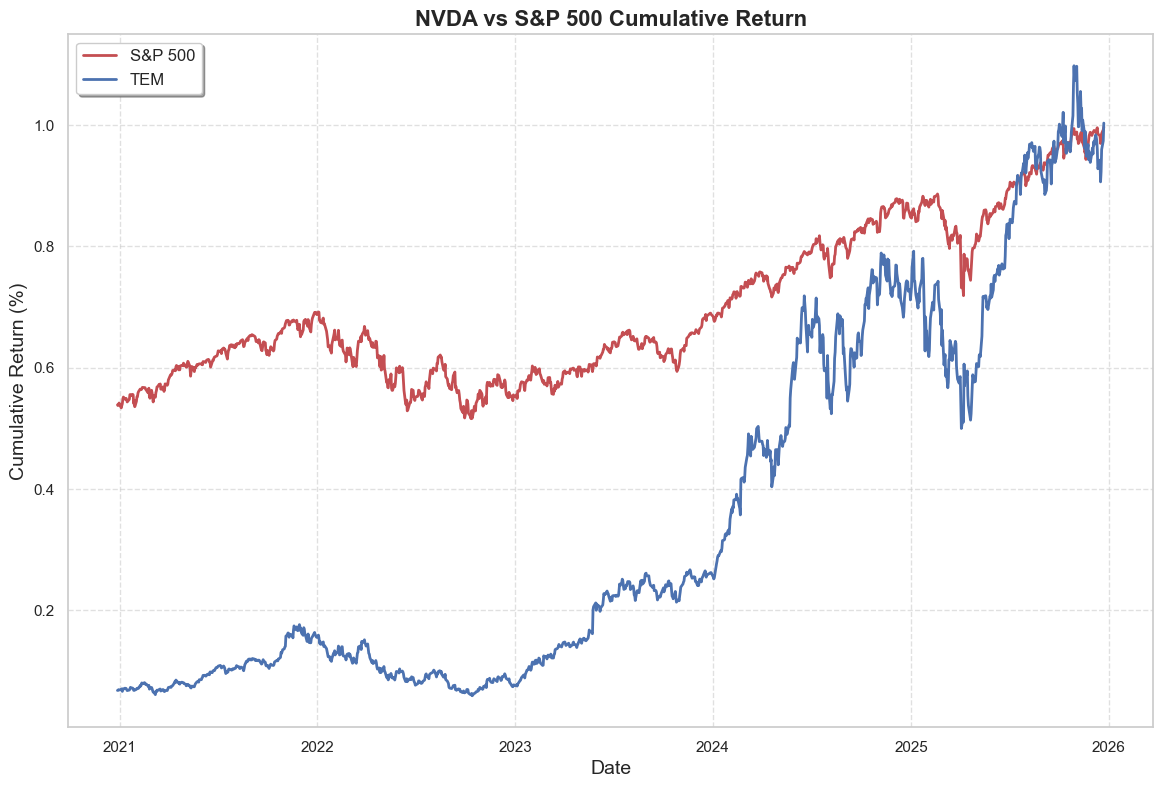

In [25]:
# -------------------------------------------------------------
# Plot Stock Performance Against S&P 500 Index
# -------------------------------------------------------------
# Set Seaborn style for better-looking plots
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(14, 9))

# Plot S&P 500 cumulative returns
plt.plot((1 + historical_sp['daily_ret']).cumprod(), label='S&P 500', color='r', linewidth=2)

# Plot company cumulative returns
plt.plot((1 + historical['daily_ret']).cumprod(), label='TEM', color='b', linewidth=2)

# Set plot title and labels
ax.set_title(f'{company} vs S&P 500 Cumulative Return', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return (%)', fontsize=14)

# Set legend and grid
ax.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

In [26]:
# -------------------------------------------------------------
# Pull Latest Stock Quote and P/E
# -------------------------------------------------------------
# Construct the API URL to fetch the latest stock quote and stats
url = f'https://financialmodelingprep.com/api/v3/quote/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get the latest stock quote
stock_quote = requests.get(url).json()

# Convert the stock quote into a DataFrame
stock_quote = pd.DataFrame(stock_quote)

# Convert timestamp to date
timestamp = stock_quote['timestamp'][0]
dt_obj = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d')
stock_quote['date'] = dt_obj

# Set the date as the index
stock_quote.set_index('date', inplace=True)

# Display the stock quote DataFrame
stock_quote

,symbol,name,price,changesPercentage,change,dayLow,dayHigh,yearHigh,yearLow,marketCap,...,exchange,volume,avgVolume,open,previousClose,eps,pe,earningsAnnouncement,sharesOutstanding,timestamp
date,,,,,,,,,,,,,,,,,,,,,
2025-12-24,NVDA,NVIDIA Corporation,188.61,-0.31711,-0.6,186.59,188.72,212.19,86.62,4592088156237,...,NASDAQ,64842705,191227934,187.92,189.21,4.05,46.57,2026-02-25T05:00:00.000+0000,24347002578,1766599200


In [27]:
# -------------------------------------------------------------
# Pull Industry P/E
# -------------------------------------------------------------
# Set the date for industry P/E
date = datetime.now().replace(day=1).date().isoformat()
exchange = 'NYSE'  # Change to 'NASDAQ' to obtain P/E for that exchange

In [28]:
# Construct the API URL to fetch industry P/E
url = f'https://financialmodelingprep.com/api/v4/industry_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'

# Make a request to the API to get the industry P/E data
industry_stats = requests.get(url).json()

# Convert the industry stats into a DataFrame
industry_stats = pd.DataFrame(industry_stats)

# Set the date as the index and convert it to datetime format
industry_stats['date'] = pd.to_datetime(industry_stats['date'])
industry_stats = industry_stats.set_index('date')

# Save the industry stats DataFrame to a CSV file
industry_stats.to_csv('industry_pe_stats.csv', index=True)

In [29]:
# -------------------------------------------------------------
# Fetch Sector P/E Data
# -------------------------------------------------------------
# Construct the API URL to fetch sector P/E data
url = f'https://financialmodelingprep.com/api/v4/sector_price_earning_ratio?date={date}&exchange={exchange}&apikey={FMP_API_KEY}'

# Make a request to the API to get the sector P/E data
sector_stats = requests.get(url).json()

# Convert the sector stats into a DataFrame
sector_stats = pd.DataFrame(sector_stats)

# Set the date as the index and convert it to datetime format
sector_stats['date'] = pd.to_datetime(sector_stats['date'])
sector_stats = sector_stats.set_index('date')

# -------------------------------------------------------------
# Save Sector P/E Data to CSV
# -------------------------------------------------------------
# Save the sector stats DataFrame to a CSV file
sector_stats.to_csv('sector_pe_stats.csv', index=True)

In [30]:
# Extract the company industry and sector from the response
company_sector = overview['profile']['sector']
company_industry = overview['profile']['industry']

company_pe = stock_quote['pe']

# Get industry and sector P/E using the extracted sector and industry
industry_pe = industry_stats.loc[industry_stats['industry'] == company_industry]
sector_pe = sector_stats.loc[sector_stats['sector'] == company_sector]

# Extract the numerical P/E values
company_pe_value = company_pe.iloc[0]  # Assuming company_pe is a Series
industry_pe_value = industry_pe['pe'].iloc[0]  # Assuming 'pe' is the column with P/E ratios
sector_pe_value = sector_pe['pe'].iloc[0]

# Print only the numerical P/E values
print(f'{company} P/E = {company_pe_value}')
print(f'Industry P/E ({company_industry}) = {industry_pe_value}')
print(f'Sector P/E ({company_sector}) = {sector_pe_value}')


NVDA P/E = 46.57
Industry P/E (Semiconductors) = 29.627374521379817
Sector P/E (Technology) = 36.80375829326415


In [31]:
# -------------------------------------------------------------
# List of Institutional Holders
# -------------------------------------------------------------
# Construct the API URL to fetch institutional holders
url = f'https://financialmodelingprep.com/api/v3/institutional-holder/{company}?apikey={FMP_API_KEY}'

# Make a request to the API to get institutional holders
institutional_holders = requests.get(url).json()

# Convert the institutional holders into a DataFrame
institutional_holders = pd.DataFrame(institutional_holders)

# Sort the DataFrame by number of shares in descending order
institutional_holders = institutional_holders.sort_values(by='shares', ascending=False)

# Print the top 20 institutional holders
institutional_holders[:20]

,holder,shares,dateReported,change
0,VANGUARD GROUP INC,2223533800,2025-09-30,-8911158
1,"BlackRock, Inc.",1929259144,2025-09-30,19470172
5632,BlackRock Inc.,1839270238,2024-06-30,1657031313
2,FMR LLC,982706616,2025-09-30,-15271223
3,STATE STREET CORP,980029103,2025-09-30,1820241
4,"GEODE CAPITAL MANAGEMENT, LLC",585419652,2025-09-30,6206155
5,JPMORGAN CHASE & CO,488619282,2025-09-30,26032415
6,PRICE T ROWE ASSOCIATES INC /MD/,395742700,2025-09-30,-10582655
5293,NORGES BANK,325253897,2025-06-30,325253897
7,MORGAN STANLEY,322956343,2025-09-30,-2754465


In [32]:
# -------------------------------------------------------------
# Sum of Shares Held by Institutions and Net Change
# -------------------------------------------------------------
# Calculate the sum of the shares held by institutions and net change
sum_institutional_shares = institutional_holders['shares'].sum()
net_change = institutional_holders['change'].sum() if 'change' in institutional_holders.columns else 'N/A'

# Print the sum of shares held by institutions and net change
print(f'Sum of shares held by institutions: {sum_institutional_shares}')
print(f'Net change in shares held by institutions: {net_change}')

Sum of shares held by institutions: 18428715978
Net change in shares held by institutions: 2052093572
